In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

def nice(df):
    df.replace(to_replace= '0.079477', value = '0.079', inplace=True )
    df.replace(to_replace= '0.79477', value = '0.795', inplace=True )
    df.replace(to_replace= '0.25133', value = '0.251', inplace=True )
    df.replace(to_replace= '2.5133', value = '2.513', inplace=True )
    df.replace(to_replace= '7.9477', value = '7.948', inplace=True )

    df['Gamma'] = df['Gamma'].astype(float)

    df['Infidelity'] = df['Infidelity'].abs()

    df.loc[df["Infidelity"] < 1e-12, "Infidelity"] = 1e-12

    df['Log_Infidelity'] = np.log10(df['Infidelity'])

    df.loc[df["Log_Infidelity"] < -12, "Log_Infidelity"] = -12

    return df

In [13]:
#df = pd.read_pickle('dataframe_KOSSAK_UNCONSTR_BFGS1_trn4_tst20_2024-Jul-30_at_08-26.pkl')
df = pd.read_pickle('dataframe_KOSSAK_UNCONSTR_RK_BFGS1_trn4_tst20_2024-Aug-01_at_03-28.pkl')

In [14]:
df

,Gamma,State,Time,gt,Fidelity,Infidelity
0,0.079477,,0.06000,0.004769,1.000000,3.219647e-15
1,0.079477,,0.08000,0.006358,0.999998,1.870530e-06
2,0.079477,,0.10000,0.007948,0.999989,1.097106e-05
3,0.079477,,0.12000,0.009537,0.999984,1.559943e-05
4,0.079477,,0.14000,0.011127,0.999994,5.828959e-06
...,...,...,...,...,...,...
1996,79.477,,0.54925,43.652742,0.994531,5.469340e-03
1997,79.477,,0.54950,43.672612,0.994534,5.466477e-03
1998,79.477,,0.54975,43.692481,0.994536,5.463608e-03
1999,79.477,,0.55000,43.712350,0.994539,5.460734e-03


In [15]:
df[df.Gamma == "25.133"].Fidelity.min()
df[df.Gamma == "251.33"].Fidelity.min()

0.9656447726132826

In [16]:
df = nice(df)

In [17]:
gammas = ['25.133', '79.477', '251.33']

pd.unique(df["Gamma"])

array([7.9000e-02, 2.5100e-01, 7.9500e-01, 2.5130e+00, 2.5133e+01,
       2.5133e+02, 7.9480e+00, 7.9477e+01])

In [18]:
def log_infidelity_from_gamma(df, title):
   
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y="Log_Infidelity", cut = 0, # hue = "Method", split=True,
                        scale="width", palette ="cool", linewidth=0.5,
                        inner= None, bw="silverman")
    
    ymin = -6
    ymax = -0.1
    
    tick_range = np.arange(ymin, ymax)
    ax.yaxis.set_ticks(tick_range, [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$',])
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_title(title)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.01), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.01), '0.01', ha='left', va='center')
    
    ax.hlines(y=np.log10(.02), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.02), '0.02', ha='left', va='center')
 
    return fig

/home/zah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


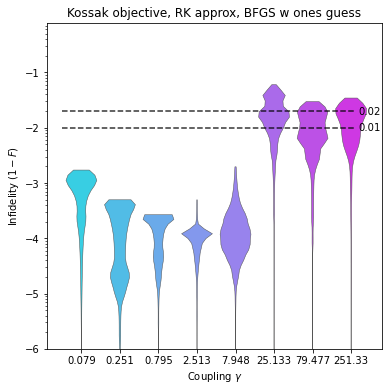

In [19]:
fig = log_infidelity_from_gamma(df, "Kossak objective, RK approx, BFGS w ones guess")

/home/zah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


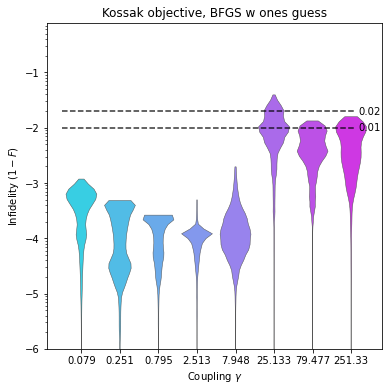

In [10]:
fig = log_infidelity_from_gamma(df, "Kossak objective, BFGS w ones guess")

In [20]:
fig.savefig("LogInfidelityKossakOptim_RK_BFGS1.pdf")

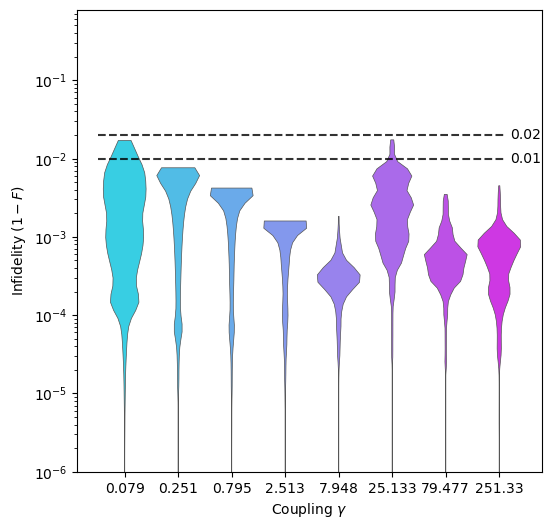

In [9]:
fig = log_infidelity_from_gamma(df, "")

In [ ]:
#fig.savefig("LogInfidelity....pdf")

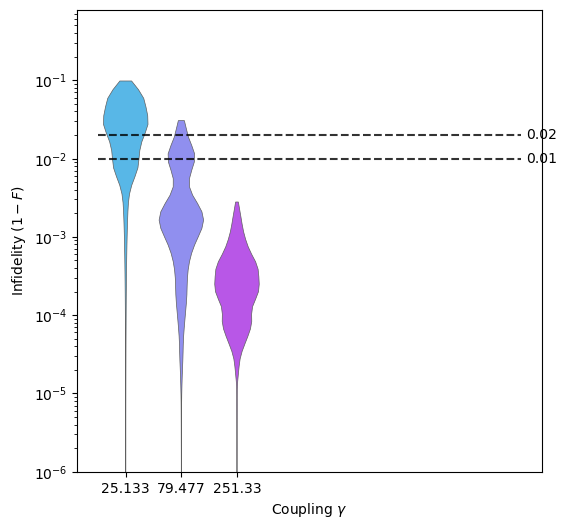

In [9]:
fig = log_infidelity_from_gamma(df, "")

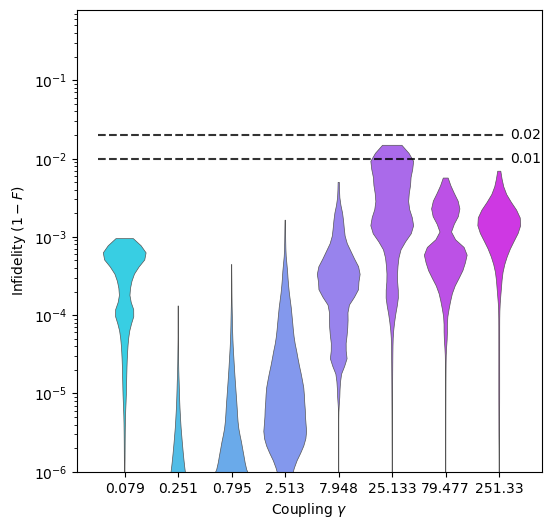

In [24]:
fig = log_infidelity_from_gamma(df, "")